# 마키아벨리즘 문항 + T, V, M, score  와 voted 

## 미국 데이터 AVG 2.0 기준, nan, 0 제외

In [2]:
df1 = pd.read_csv('../MACH_data/cut_off_by_avg.csv')
df1

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
1,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,...,Atheist,Bisexual,Asian,No,Never married,2,98.0,43.0,45.0,10.0
2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
4,4.0,4.0,9.0,3.0,5.0,6.0,5.0,15.0,18.0,3.0,...,Agnostic,Heterosexual,Other,No,Never married,3,76.0,36.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53015,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,1.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
53016,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,4.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
53017,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
53018,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0


In [16]:
df1[(df1["voted"] == "Yes")&(df1["age"] == 13)]

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
894,5.0,13.0,4.0,4.0,16.0,7.0,1.0,9.0,4.0,1.0,...,Buddhist,Other,Asian,Yes,Never married,2,89.0,37.0,42.0,10.0
13346,5.0,10.0,3.0,5.0,9.0,4.0,2.0,15.0,5.0,1.0,...,Christian(othrer),Bisexual,White,Yes,Never married,3,81.0,36.0,38.0,7.0
40803,5.0,15.0,6.0,4.0,13.0,5.0,1.0,19.0,7.0,1.0,...,Buddhist,Heterosexual,Asian,Yes,Never married,2,92.0,43.0,42.0,7.0
44151,5.0,8.0,9.0,5.0,10.0,4.0,1.0,4.0,9.0,1.0,...,Christian(Catholic),Asexual,White,Yes,Never married,2,100.0,45.0,45.0,10.0
45014,5.0,14.0,5.0,5.0,4.0,6.0,4.0,10.0,2.0,3.0,...,Jewish,Homosexual,White,Yes,Never married,1,72.0,35.0,30.0,7.0


In [3]:
a = list(df1.columns)
pos_col = []
neg_col = []

for col in a:
    if "P" in col and "Y" not in col:
        pos_col.append(col)
    if "N" in col:
        neg_col.append(col)
        
print(pos_col, '\n', '\n', neg_col)

['Q1_TP_notell_2u', 'Q2_TP_ppl_nd_dangun', 'Q5_VP_ppl_bad', 'Q8_VP_ppl_lazy', 'Q12_TP_trust_trouble', 'Q13_VP_ppl_criminal', 'Q15_TP_abu_good', 'Q18_VP_komsu_better', 'Q19_MP_anrocksa_ok', 'Q20_VP_money_good'] 
 
 ['Q3_TN_do_moral', 'Q4_VN_ppl_good', 'Q6_TN_hnsty_best', 'Q7_TN_lying_bad', 'Q9_MN_humble_hnst', 'Q10_TN_hnstly_ask', 'Q11_VN_leader_clean', 'Q14_VN_ppl_brave', 'Q16_TN_ppl_good', 'Q17_VN_ppl_notbad']


In [4]:
b = ['score', 'v_score', 't_score', 'm_score', "voted"]

In [5]:
df2 = df1[(pos_col + neg_col+b)]
df2

,Q1_TP_notell_2u,Q2_TP_ppl_nd_dangun,Q5_VP_ppl_bad,Q8_VP_ppl_lazy,Q12_TP_trust_trouble,Q13_VP_ppl_criminal,Q15_TP_abu_good,Q18_VP_komsu_better,Q19_MP_anrocksa_ok,Q20_VP_money_good,...,Q10_TN_hnstly_ask,Q11_VN_leader_clean,Q14_VN_ppl_brave,Q16_TN_ppl_good,Q17_VN_ppl_notbad,score,v_score,t_score,m_score,voted
0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,...,1.0,1.0,2.0,1.0,2.0,91.0,37.0,45.0,9.0,No
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,...,1.0,1.0,1.0,1.0,1.0,98.0,43.0,45.0,10.0,No
2,2.0,4.0,5.0,2.0,5.0,1.0,4.0,5.0,3.0,4.0,...,2.0,1.0,1.0,1.0,1.0,78.0,37.0,36.0,5.0,Yes
3,5.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,1.0,...,2.0,1.0,1.0,1.0,1.0,85.0,35.0,41.0,9.0,Yes
4,4.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,4.0,2.0,...,2.0,1.0,1.0,1.0,1.0,76.0,36.0,32.0,8.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53015,4.0,1.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,...,5.0,1.0,2.0,1.0,1.0,83.0,42.0,34.0,7.0,Yes
53016,5.0,5.0,3.0,2.0,2.0,5.0,4.0,5.0,5.0,5.0,...,4.0,4.0,2.0,5.0,3.0,64.0,31.0,26.0,7.0,No
53017,2.0,1.0,3.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,...,4.0,1.0,2.0,5.0,3.0,59.0,28.0,26.0,5.0,No
53018,5.0,5.0,5.0,3.0,5.0,4.0,5.0,4.0,5.0,3.0,...,1.0,1.0,1.0,3.0,3.0,90.0,37.0,43.0,10.0,No


### automl non scaler

In [6]:
from pycaret.classification import *

In [7]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = df2, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,2880
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(53020, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [8]:
# train test 7:3
(37113 + 15907)/15907

3.333123781982775

In [133]:
compare_models(b)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6010,0.6377,0.5046,0.5878,0.5429,0.1925,0.1943,2.0550
1,CatBoost Classifier,0.5995,0.6346,0.5281,0.5811,0.5532,0.1918,0.1926,8.6387
2,Ada Boost Classifier,0.5989,0.6334,0.5053,0.5847,0.5420,0.1887,0.1903,0.5634
3,Linear Discriminant Analysis,0.5944,0.6248,0.4917,0.5807,0.5323,0.1786,0.1806,0.0434
4,Ridge Classifier,0.5943,0.0000,0.4913,0.5807,0.5321,0.1785,0.1805,0.0098
5,Light Gradient Boosting Machine,0.5943,0.6303,0.5241,0.5748,0.5481,0.1814,0.1821,0.1900
6,Logistic Regression,0.5941,0.6249,0.4900,0.5806,0.5313,0.1779,0.1799,0.0924
7,Extra Trees Classifier,0.5849,0.6121,0.4865,0.5679,0.5240,0.1599,0.1614,0.5286
8,Extreme Gradient Boosting,0.5798,0.6058,0.5187,0.5565,0.5368,0.1531,0.1535,2.1435
9,Naive Bayes,0.5616,0.5799,0.5370,0.5332,0.5349,0.1203,0.1203,0.0070


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6240, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### catboost 안그려짐

In [104]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5951,0.6354,0.5381,0.5738,0.5554,0.1844,0.1848
1,0.6100,0.6363,0.5328,0.5950,0.5622,0.2126,0.2136
2,0.6195,0.6603,0.5729,0.5996,0.5859,0.2343,0.2345
3,0.5971,0.6299,0.5317,0.5775,0.5537,0.1877,0.1882
4,0.5999,0.6249,0.5429,0.5790,0.5603,0.1940,0.1943
5,0.5895,0.6301,0.4995,0.5721,0.5333,0.1699,0.1711
6,0.5924,0.6267,0.5048,0.5754,0.5378,0.1761,0.1773
7,0.6108,0.6424,0.5397,0.5944,0.5657,0.2147,0.2155
8,0.5949,0.6410,0.5143,0.5772,0.5439,0.1818,0.1828
9,0.5636,0.6002,0.4915,0.5394,0.5144,0.1197,0.1201


In [110]:
plot_model(estimator = catboost, plot = 'feature')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

#### gbc

In [106]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5837,0.6268,0.4894,0.5660,0.5249,0.1579,0.1593
1,0.6031,0.6343,0.5053,0.5909,0.5447,0.1967,0.1986
2,0.6264,0.6669,0.5381,0.6177,0.5751,0.2446,0.2465
3,0.6031,0.6387,0.5032,0.5913,0.5437,0.1965,0.1985
4,0.5944,0.6305,0.5016,0.5788,0.5374,0.1796,0.1811
5,0.6093,0.6335,0.5122,0.5983,0.5519,0.2093,0.2113
6,0.5885,0.6186,0.4720,0.5755,0.5186,0.1653,0.1678
7,0.6198,0.6532,0.5397,0.6071,0.5714,0.2319,0.2332
8,0.5989,0.6419,0.4984,0.5858,0.5386,0.1879,0.1898
9,0.5731,0.6116,0.4704,0.5542,0.5089,0.1357,0.1371


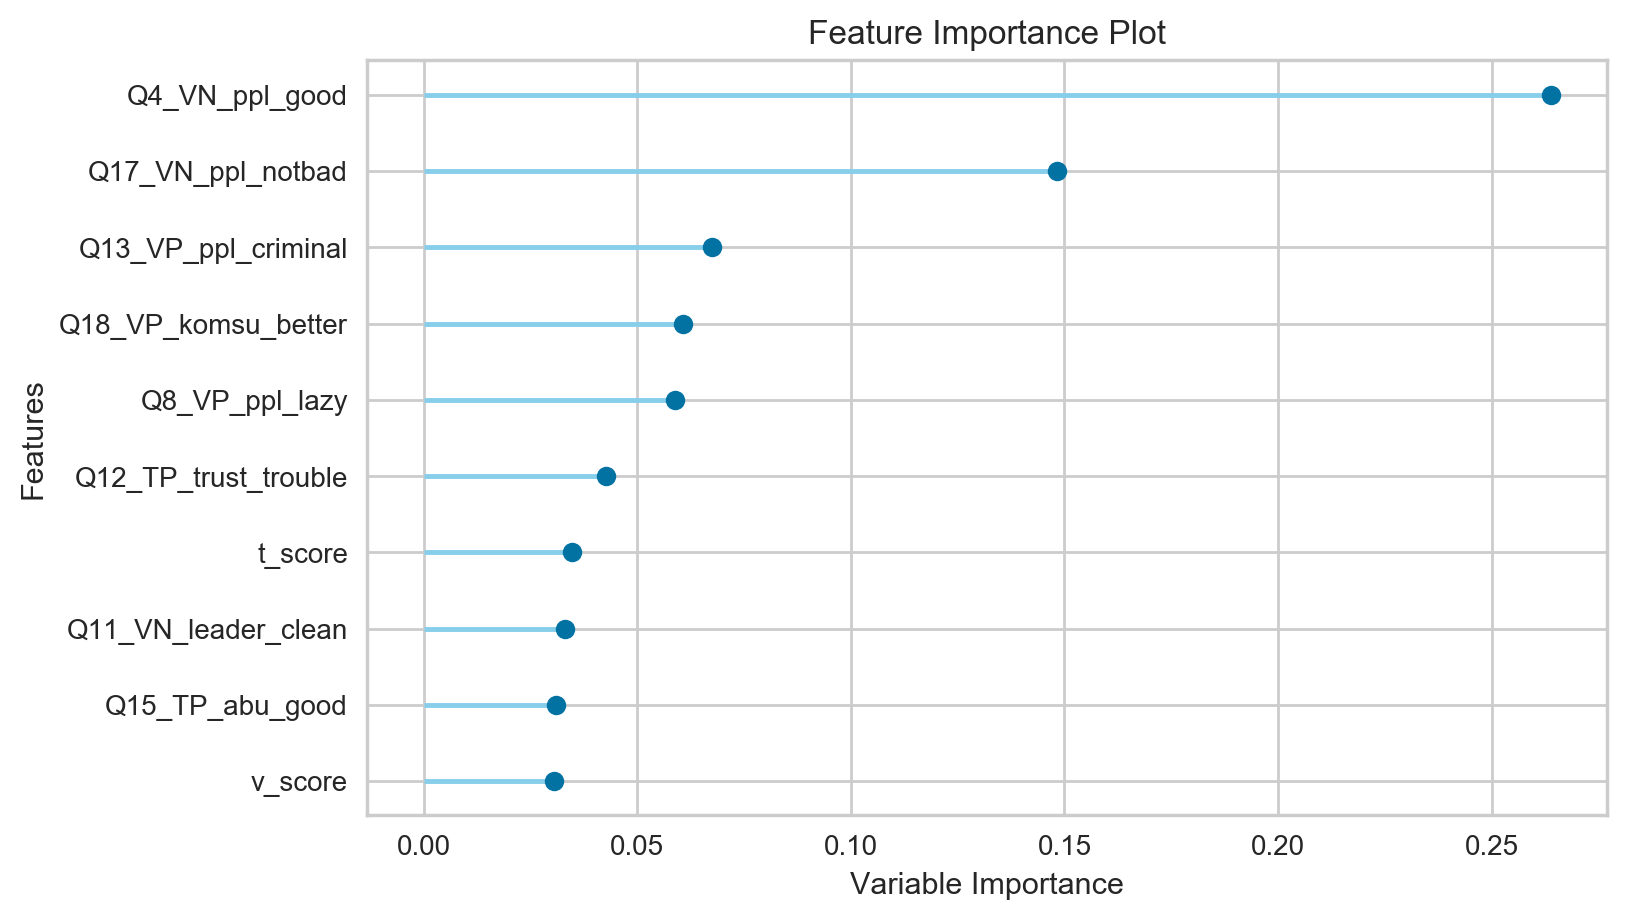

In [107]:
plot_model(estimator = gbc, plot = 'feature')

#### Linear Discriminant Analysis

In [108]:
lda=create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5852,0.6193,0.4958,0.5671,0.5290,0.1614,0.1626
1,0.6026,0.6290,0.4926,0.5929,0.5381,0.1946,0.1971
2,0.6220,0.6582,0.5317,0.6127,0.5693,0.2354,0.2373
3,0.5807,0.6237,0.4577,0.5668,0.5064,0.1491,0.1517
4,0.5919,0.6236,0.4899,0.5773,0.5301,0.1737,0.1756
5,0.5880,0.6114,0.4910,0.5714,0.5282,0.1662,0.1677
6,0.5790,0.6102,0.4487,0.5653,0.5003,0.1449,0.1477
7,0.6143,0.6499,0.5249,0.6027,0.5611,0.2200,0.2217
8,0.5840,0.6183,0.4677,0.5696,0.5137,0.1563,0.1586
9,0.5810,0.6032,0.4767,0.5645,0.5169,0.1516,0.1533


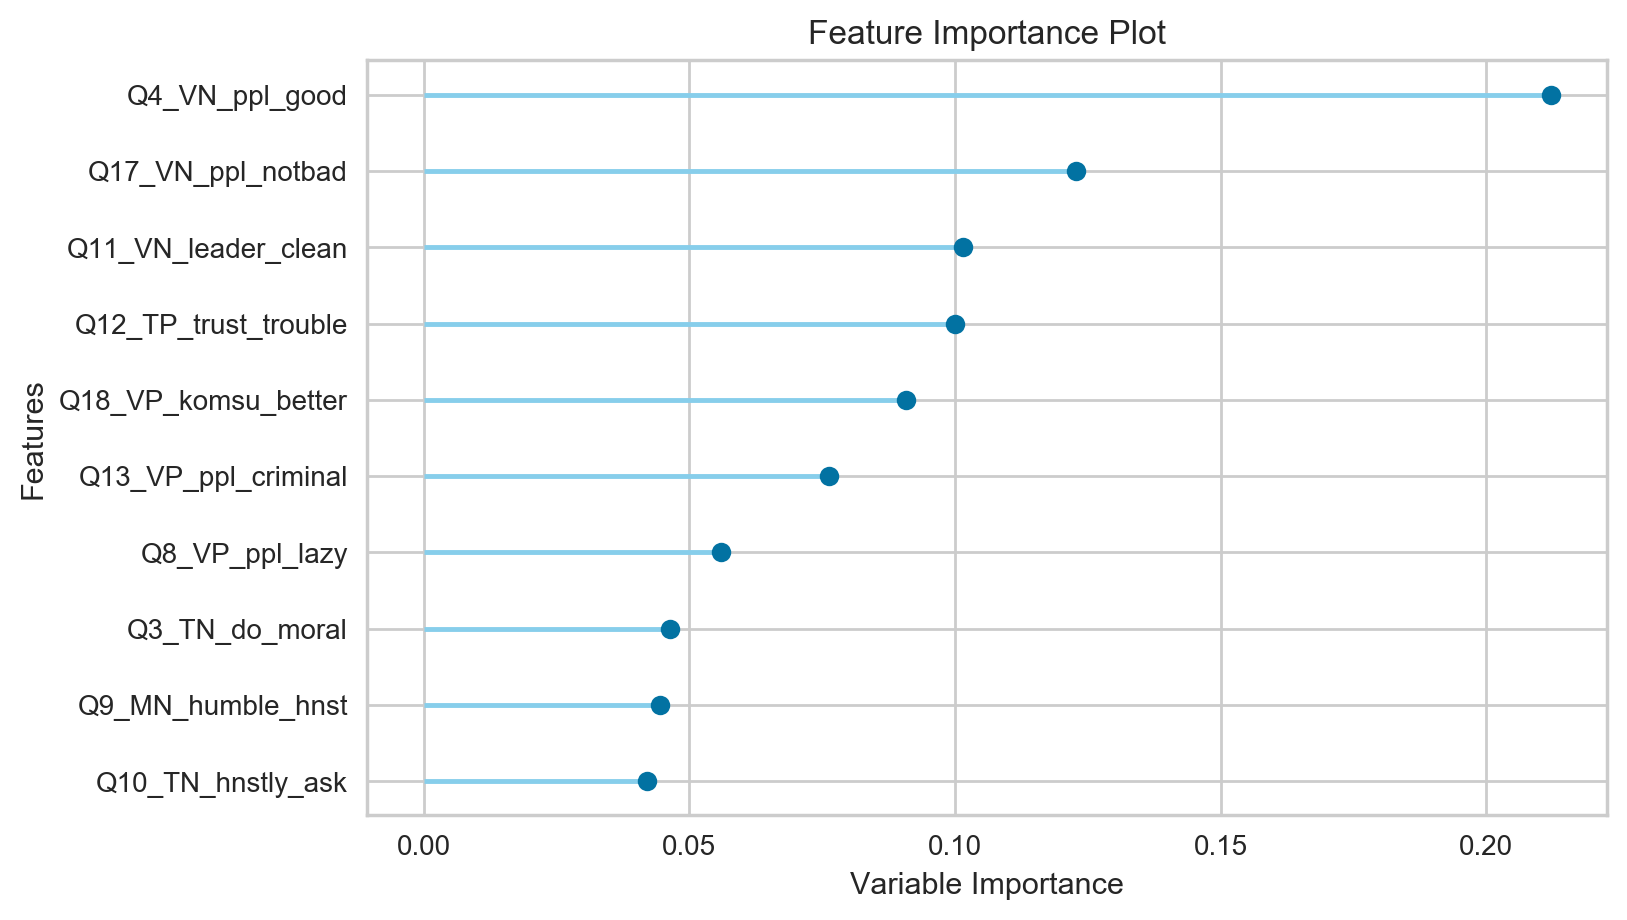

In [109]:
plot_model(estimator = lda, plot = 'feature')

### automl 스케일 maxabs

In [97]:
from pycaret.classification import *

In [134]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data=df2, target="voted", normalize=True, normalize_method = "maxabs")

Setup Succesfully Completed!


,Description,Value
0,session_id,6019
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(28749, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [102]:
# train test 7:3
(20124 + 8625)/8625

3.333217391304348

In [131]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6029,0.6407,0.5100,0.5895,0.5468,0.1968,0.1984,2.0452
1,Ada Boost Classifier,0.5998,0.6349,0.5019,0.5867,0.5408,0.1901,0.1920,0.5448
2,CatBoost Classifier,0.5983,0.6335,0.5247,0.5802,0.5510,0.1893,0.1902,7.1747
3,Light Gradient Boosting Machine,0.5944,0.6293,0.5242,0.5750,0.5483,0.1818,0.1824,0.1843
4,Linear Discriminant Analysis,0.5942,0.6253,0.4911,0.5807,0.5320,0.1783,0.1803,0.0449
5,Ridge Classifier,0.5940,0.0000,0.4906,0.5805,0.5317,0.1778,0.1799,0.0093
6,Logistic Regression,0.5937,0.6253,0.4895,0.5803,0.5309,0.1772,0.1792,0.0584
7,Extra Trees Classifier,0.5837,0.6084,0.4810,0.5672,0.5205,0.1570,0.1587,0.5095
8,Extreme Gradient Boosting,0.5777,0.6034,0.5162,0.5544,0.5345,0.1490,0.1494,2.1047
9,SVM - Linear Kernel,0.5695,0.0000,0.6123,0.5528,0.5488,0.1427,0.1585,0.0979


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4161, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### catboost 안그려짐

In [135]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6195,0.6536,0.5539,0.6037,0.5777,0.2326,0.2333
1,0.5872,0.6241,0.5148,0.5669,0.5396,0.1670,0.1677
2,0.6215,0.6534,0.5571,0.6057,0.5804,0.2367,0.2374
3,0.6175,0.6534,0.5370,0.6048,0.5689,0.2273,0.2286
4,0.5910,0.6224,0.5402,0.5684,0.5539,0.1767,0.1769
5,0.6059,0.6434,0.5101,0.5936,0.5487,0.2024,0.2042
6,0.5885,0.6231,0.5058,0.5697,0.5359,0.1686,0.1695
7,0.5915,0.6276,0.5185,0.5718,0.5438,0.1755,0.1762
8,0.6178,0.6507,0.5492,0.6021,0.5744,0.2289,0.2297
9,0.5900,0.6251,0.5111,0.5709,0.5394,0.1719,0.1728


In [110]:
plot_model(estimator = catboost, plot = 'feature')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

#### gbc

In [136]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6115,0.6491,0.5159,0.6010,0.5552,0.2139,0.2159
1,0.6026,0.6332,0.5074,0.5897,0.5455,0.1959,0.1977
2,0.6170,0.6582,0.5338,0.6048,0.5671,0.2261,0.2275
3,0.6125,0.6550,0.5032,0.6056,0.5497,0.2147,0.2175
4,0.5880,0.6210,0.5021,0.5702,0.5340,0.1674,0.1685
5,0.6029,0.6482,0.4878,0.5941,0.5357,0.1946,0.1975
6,0.5944,0.6301,0.5111,0.5771,0.5421,0.1805,0.1816
7,0.5895,0.6249,0.4942,0.5730,0.5307,0.1694,0.1708
8,0.6183,0.6497,0.5323,0.6068,0.5671,0.2283,0.2299
9,0.6083,0.6376,0.5005,0.5995,0.5456,0.2063,0.2089


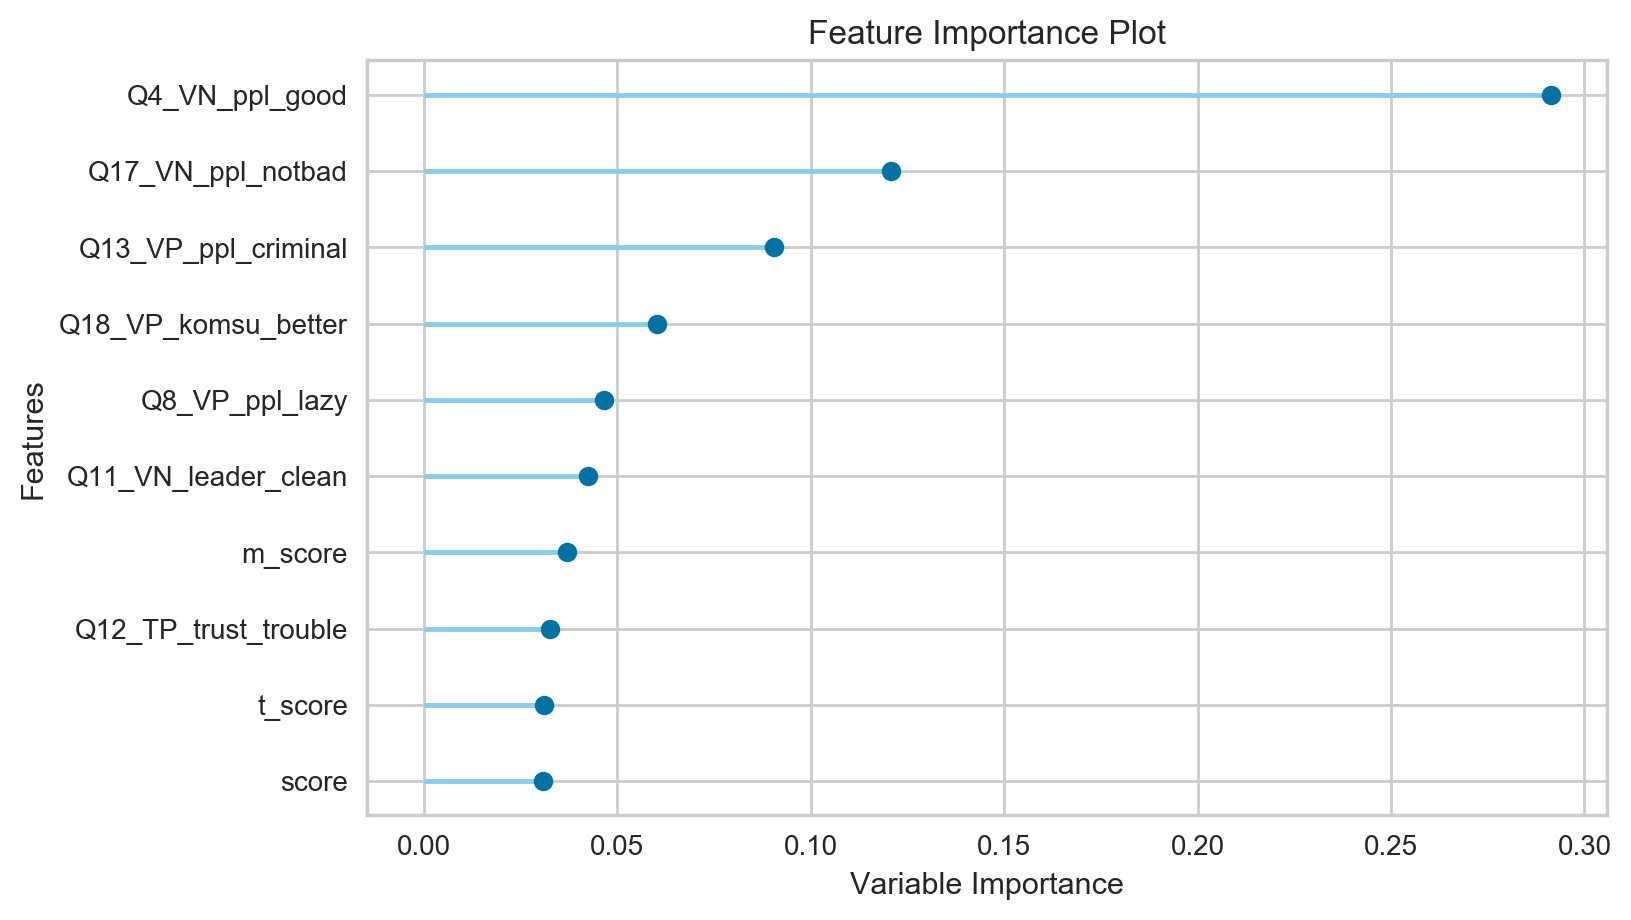

In [137]:
plot_model(estimator = gbc, plot = 'feature')

#### ada

In [138]:
ada=create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6135,0.6511,0.5275,0.6012,0.5619,0.2188,0.2203
1,0.5857,0.6214,0.4820,0.5700,0.5223,0.1610,0.1628
2,0.6076,0.6466,0.5180,0.5947,0.5537,0.2065,0.2080
3,0.6071,0.6476,0.4937,0.5995,0.5414,0.2033,0.2062
4,0.5850,0.6131,0.5021,0.5662,0.5322,0.1617,0.1626
5,0.5959,0.6374,0.4720,0.5868,0.5232,0.1797,0.1829
6,0.5979,0.6236,0.5079,0.5825,0.5427,0.1869,0.1883
7,0.5795,0.6262,0.4847,0.5606,0.5199,0.1494,0.1506
8,0.6143,0.6455,0.5291,0.6017,0.5631,0.2204,0.2219
9,0.6044,0.6326,0.5026,0.5930,0.5441,0.1988,0.2010


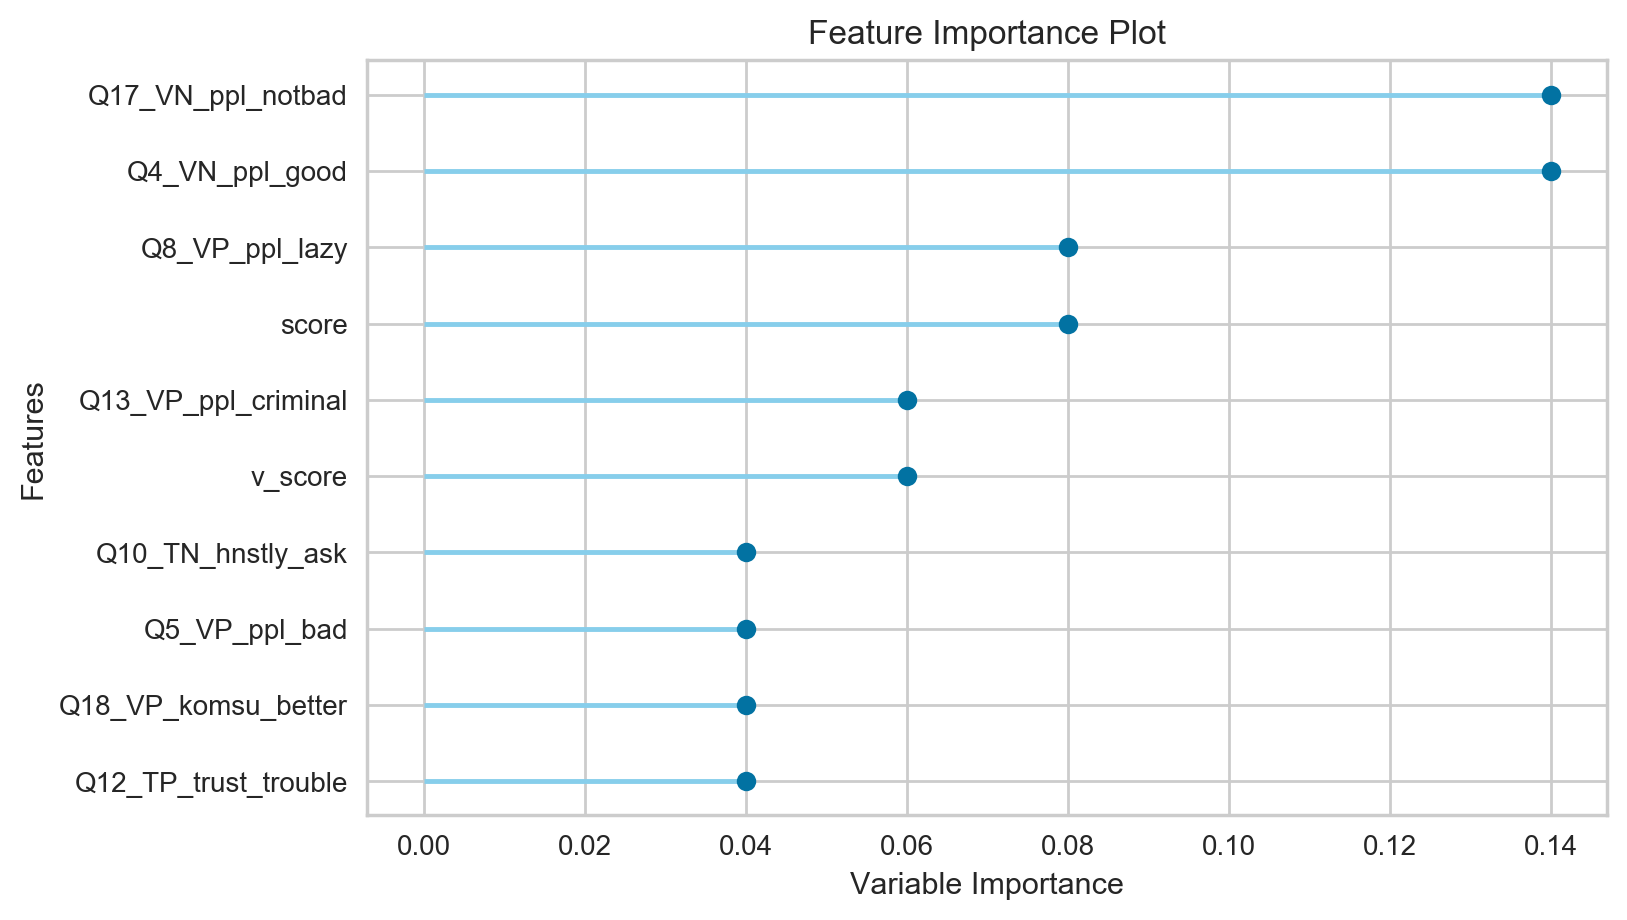

In [139]:
plot_model(estimator = ada, plot = 'feature')

### automl 스케일 robust

In [97]:
from pycaret.classification import *

In [140]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data=df2, target="voted", normalize=True, normalize_method = "robust")

Setup Succesfully Completed!


,Description,Value
0,session_id,1878
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(28749, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [102]:
# train test 7:3
(20124 + 8625)/8625

3.333217391304348

In [141]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.5982,0.6329,0.4979,0.5852,0.5379,0.1866,0.1885,0.5429
1,CatBoost Classifier,0.5969,0.6315,0.5240,0.5786,0.5498,0.1865,0.1874,7.9490
2,Gradient Boosting Classifier,0.5961,0.6355,0.4896,0.5836,0.5324,0.1817,0.1839,2.0360
3,Light Gradient Boosting Machine,0.5958,0.6284,0.5213,0.5775,0.5478,0.1842,0.1850,0.2089
4,Logistic Regression,0.5951,0.6252,0.4928,0.5816,0.5333,0.1800,0.1820,0.0247
5,Ridge Classifier,0.5951,0.0000,0.4930,0.5816,0.5335,0.1802,0.1821,0.0092
6,Linear Discriminant Analysis,0.5951,0.6252,0.4931,0.5816,0.5335,0.1802,0.1822,0.0445
7,SVM - Linear Kernel,0.5855,0.0000,0.4568,0.5768,0.5006,0.1578,0.1638,0.1226
8,Extra Trees Classifier,0.5786,0.6066,0.4758,0.5609,0.5148,0.1467,0.1483,0.4873
9,Extreme Gradient Boosting,0.5753,0.6063,0.5170,0.5516,0.5336,0.1446,0.1449,2.1414


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1878)

#### catboost 안그려짐

In [142]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5956,0.6295,0.5402,0.5742,0.5566,0.1856,0.1859
1,0.6105,0.6498,0.5264,0.5971,0.5596,0.2130,0.2143
2,0.6001,0.6348,0.5275,0.5823,0.5535,0.1930,0.1938
3,0.5623,0.5908,0.4831,0.5383,0.5092,0.1164,0.1169
4,0.6064,0.6426,0.5063,0.5958,0.5474,0.2032,0.2053
5,0.6029,0.6361,0.5386,0.5837,0.5603,0.1993,0.1998
6,0.6029,0.6467,0.5217,0.5869,0.5524,0.1977,0.1988
7,0.5984,0.6308,0.5566,0.5749,0.5656,0.1924,0.1925
8,0.5910,0.6252,0.5196,0.5709,0.5440,0.1746,0.1753
9,0.5989,0.6285,0.5196,0.5818,0.5489,0.1899,0.1909


In [110]:
plot_model(estimator = catboost, plot = 'feature')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

#### gbc

In [143]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5862,0.6267,0.4810,0.5709,0.5221,0.1619,0.1637
1,0.6021,0.6509,0.4852,0.5938,0.5340,0.1929,0.1959
2,0.6016,0.6400,0.5106,0.5876,0.5464,0.1943,0.1958
3,0.5658,0.5952,0.4556,0.5456,0.4965,0.1203,0.1218
4,0.5954,0.6387,0.4725,0.5866,0.5234,0.1790,0.1821
5,0.5989,0.6375,0.4995,0.5856,0.5391,0.1880,0.1899
6,0.6074,0.6519,0.4889,0.6008,0.5391,0.2033,0.2066
7,0.5934,0.6391,0.4963,0.5783,0.5342,0.1772,0.1788
8,0.6044,0.6418,0.5090,0.5916,0.5472,0.1994,0.2012
9,0.6054,0.6332,0.4974,0.5957,0.5421,0.2003,0.2028


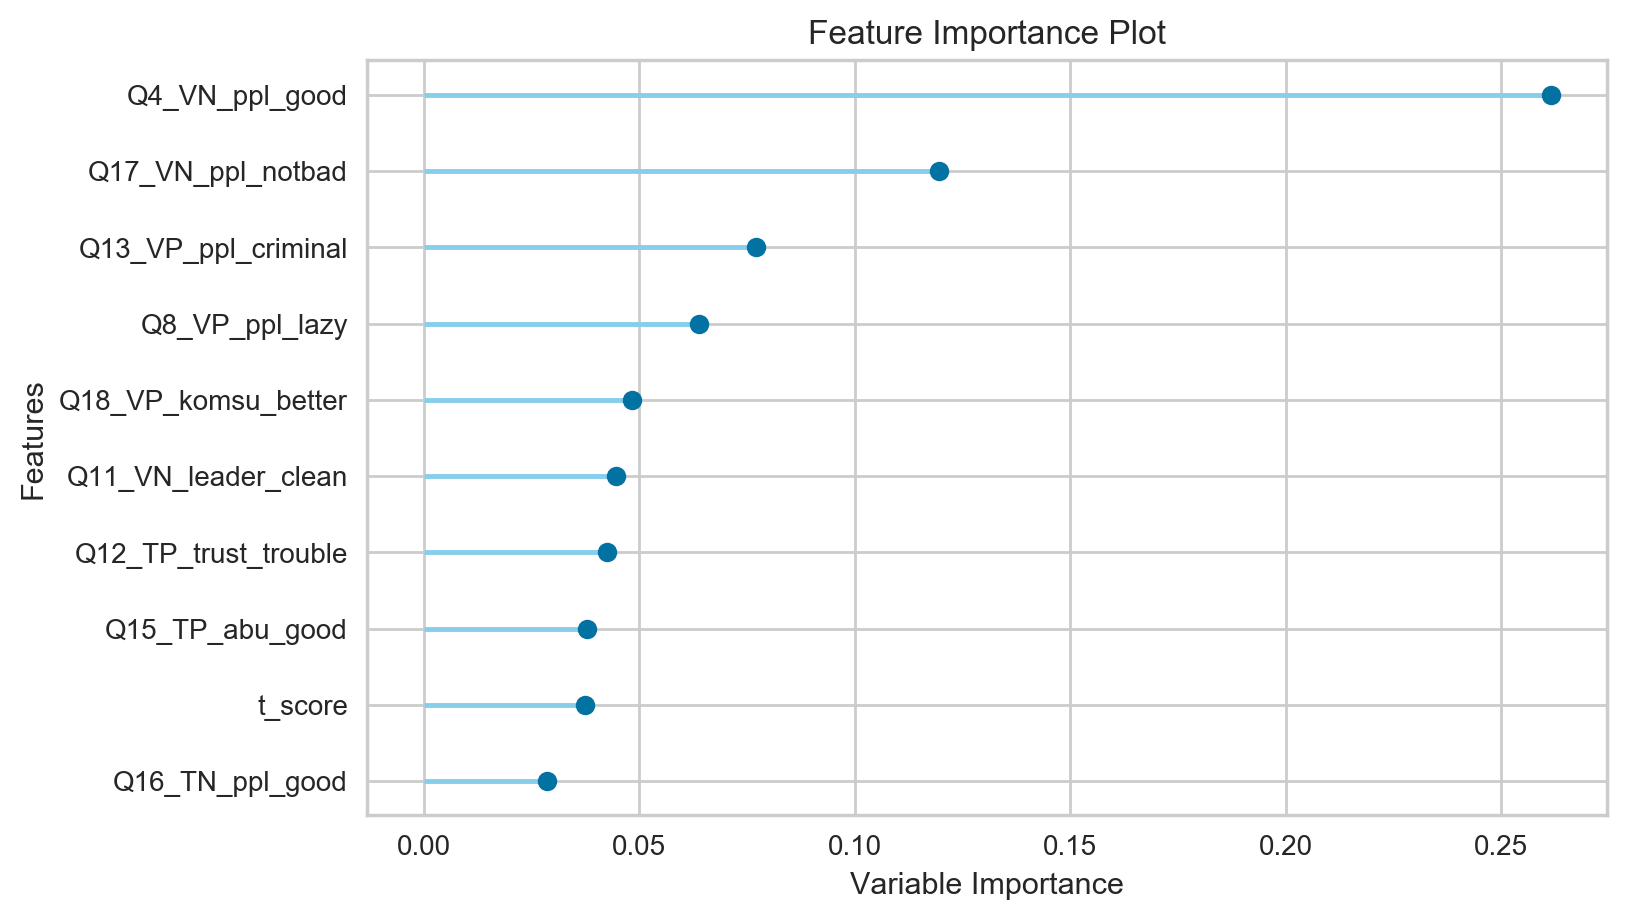

In [144]:
plot_model(estimator = gbc, plot = 'feature')

#### ada

In [145]:
ada=create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5971,0.6334,0.5053,0.5822,0.5410,0.1852,0.1867
1,0.6100,0.6556,0.4989,0.6028,0.5460,0.2095,0.2124
2,0.6071,0.6411,0.5137,0.5949,0.5513,0.2051,0.2069
3,0.5787,0.5928,0.4767,0.5609,0.5154,0.1472,0.1487
4,0.5895,0.6281,0.4852,0.5752,0.5264,0.1687,0.1706
5,0.5969,0.6318,0.5026,0.5821,0.5395,0.1845,0.1861
6,0.6044,0.6459,0.4751,0.5995,0.5301,0.1963,0.2003
7,0.5979,0.6357,0.5153,0.5811,0.5463,0.1876,0.1887
8,0.6093,0.6392,0.5238,0.5957,0.5574,0.2104,0.2118
9,0.5910,0.6255,0.4825,0.5772,0.5256,0.1711,0.1732


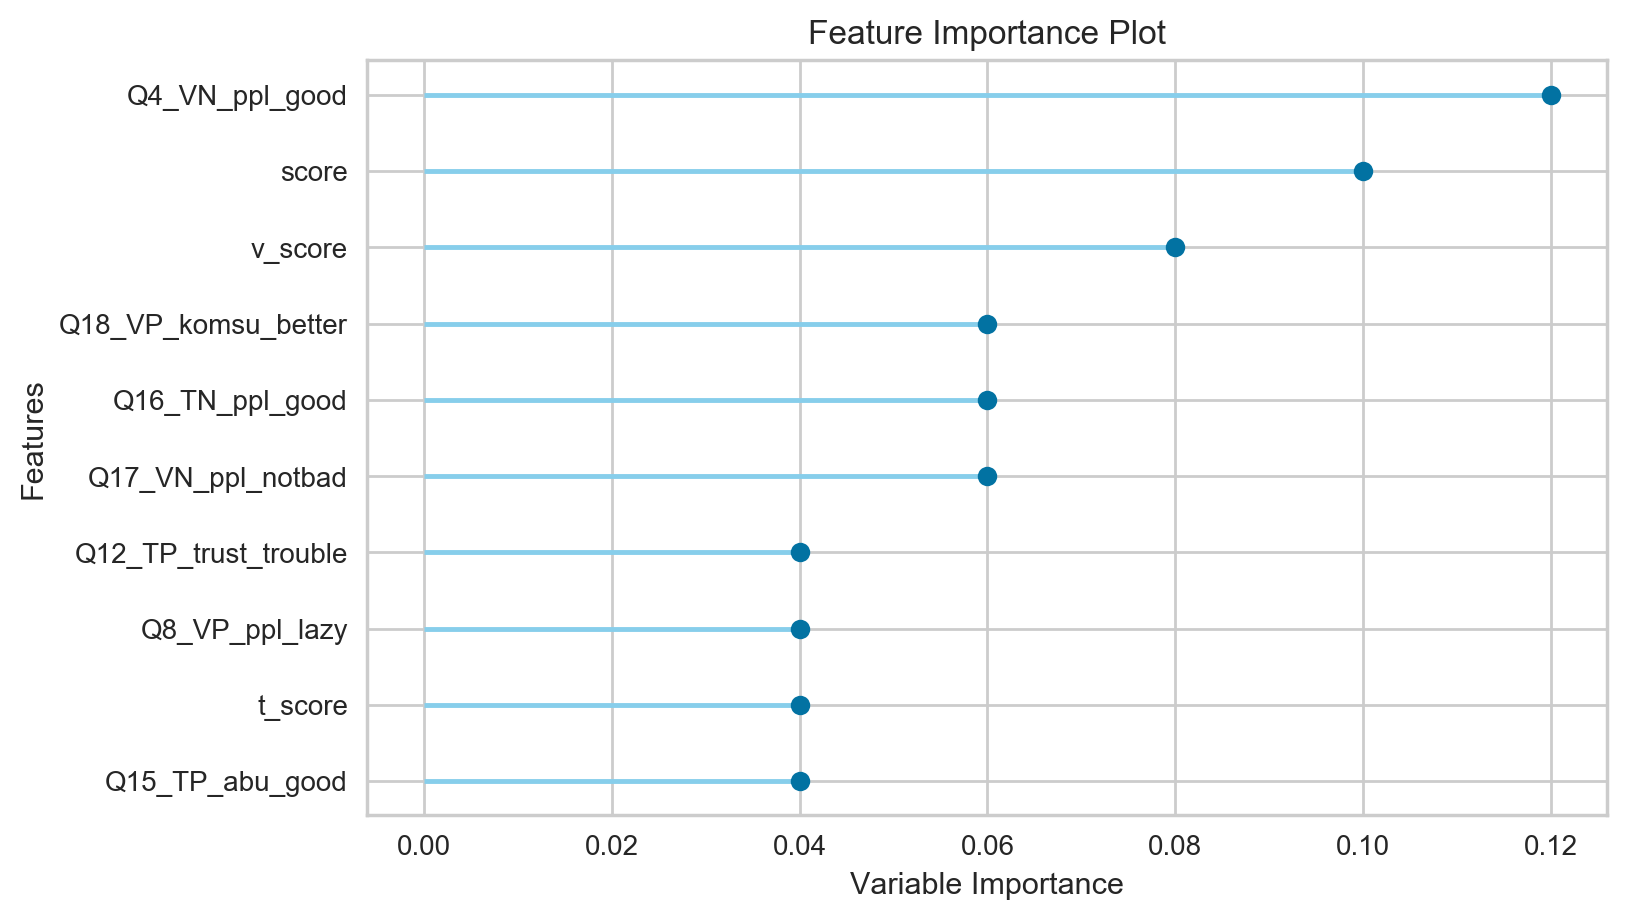

In [146]:
plot_model(estimator = ada, plot = 'feature')

# 마키아벨리즘 문항 + T, V, M, score  와 voted 

## 미국 데이터 AVG 2.0 기준, nan, 0 제외

In [125]:
df1 = pd.read_csv('../MACH_data/cut_off_by_avg.csv')
df1

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,3.0,6.0,21.0,3.0,7.0,19.0,5.0,20.0,15.0,2.0,...,Christian(othrer),Heterosexual,Black,Yes,Currently married,5,75.0,35.0,33.0,7.0
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
2,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,...,Atheist,Bisexual,Asian,No,Never married,2,98.0,43.0,45.0,10.0
3,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
4,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62448,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
62449,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
62450,2.0,17.0,5.0,1.0,18.0,7.0,1.0,9.0,5.0,1.0,...,Agnostic,Heterosexual,White,No,Never married,3,69.0,34.0,27.0,8.0
62451,4.0,15.0,8.0,3.0,9.0,8.0,5.0,17.0,9.0,3.0,...,Buddhist,Heterosexual,Asian,Yes,Never married,4,53.0,25.0,22.0,6.0


In [126]:
df1 = df1[df1.country == "US"]
df1

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
1,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
2,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,...,Atheist,Bisexual,Asian,No,Never married,2,98.0,43.0,45.0,10.0
5,4.0,4.0,9.0,3.0,5.0,6.0,5.0,15.0,18.0,3.0,...,Agnostic,Heterosexual,Other,No,Never married,3,76.0,36.0,32.0,8.0
13,2.0,16.0,5.0,4.0,11.0,5.0,4.0,6.0,9.0,4.0,...,Atheist,Heterosexual,White,Yes,Previously married,3,60.0,27.0,27.0,6.0
14,4.0,14.0,10.0,1.0,5.0,6.0,4.0,8.0,8.0,1.0,...,Agnostic,Heterosexual,Other,No,Currently married,3,59.0,34.0,19.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62429,2.0,3.0,12.0,2.0,10.0,6.0,2.0,20.0,10.0,1.0,...,Agnostic,Heterosexual,Asian,No,Never married,1,74.0,32.0,33.0,9.0
62440,4.0,2.0,5.0,5.0,1.0,5.0,3.0,12.0,5.0,2.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,3,78.0,34.0,37.0,7.0
62442,1.0,5.0,2.0,1.0,11.0,4.0,4.0,2.0,11.0,1.0,...,Atheist,Bisexual,White,No,Never married,4,45.0,24.0,16.0,5.0
62448,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0


In [127]:
a = list(df1.columns)
pos_col = []
neg_col = []

for col in a:
    if "P" in col and "Y" not in col:
        pos_col.append(col)
    if "N" in col:
        neg_col.append(col)
        
print(pos_col, '\n', '\n', neg_col)

['Q1_TP_notell_2u', 'Q2_TP_ppl_nd_dangun', 'Q5_VP_ppl_bad', 'Q8_VP_ppl_lazy', 'Q12_TP_trust_trouble', 'Q13_VP_ppl_criminal', 'Q15_TP_abu_good', 'Q18_VP_komsu_better', 'Q19_MP_anrocksa_ok', 'Q20_VP_money_good'] 
 
 ['Q3_TN_do_moral', 'Q4_VN_ppl_good', 'Q6_TN_hnsty_best', 'Q7_TN_lying_bad', 'Q9_MN_humble_hnst', 'Q10_TN_hnstly_ask', 'Q11_VN_leader_clean', 'Q14_VN_ppl_brave', 'Q16_TN_ppl_good', 'Q17_VN_ppl_notbad']


In [128]:
b = ['score', 'v_score', 't_score', 'm_score', "voted"]

In [129]:
df2 = df1[(pos_col + neg_col+b)]
df2

,Q1_TP_notell_2u,Q2_TP_ppl_nd_dangun,Q5_VP_ppl_bad,Q8_VP_ppl_lazy,Q12_TP_trust_trouble,Q13_VP_ppl_criminal,Q15_TP_abu_good,Q18_VP_komsu_better,Q19_MP_anrocksa_ok,Q20_VP_money_good,...,Q10_TN_hnstly_ask,Q11_VN_leader_clean,Q14_VN_ppl_brave,Q16_TN_ppl_good,Q17_VN_ppl_notbad,score,v_score,t_score,m_score,voted
1,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,5.0,3.0,...,1.0,1.0,2.0,1.0,2.0,91.0,37.0,45.0,9.0,No
2,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,...,1.0,1.0,1.0,1.0,1.0,98.0,43.0,45.0,10.0,No
5,4.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,4.0,2.0,...,2.0,1.0,1.0,1.0,1.0,76.0,36.0,32.0,8.0,No
13,2.0,4.0,2.0,4.0,2.0,1.0,4.0,4.0,5.0,1.0,...,4.0,1.0,1.0,1.0,3.0,60.0,27.0,27.0,6.0,Yes
14,4.0,1.0,4.0,3.0,4.0,2.0,1.0,4.0,5.0,1.0,...,3.0,1.0,1.0,4.0,1.0,59.0,34.0,19.0,6.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62429,2.0,2.0,4.0,1.0,5.0,2.0,2.0,5.0,5.0,2.0,...,2.0,1.0,1.0,1.0,3.0,74.0,32.0,33.0,9.0,No
62440,4.0,5.0,5.0,4.0,4.0,2.0,4.0,4.0,4.0,1.0,...,2.0,1.0,2.0,2.0,1.0,78.0,34.0,37.0,7.0,Yes
62442,1.0,1.0,1.0,3.0,4.0,1.0,4.0,1.0,4.0,1.0,...,5.0,2.0,2.0,5.0,2.0,45.0,24.0,16.0,5.0,No
62448,2.0,1.0,3.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,...,4.0,1.0,2.0,5.0,3.0,59.0,28.0,26.0,5.0,No


### automl non scaler

In [97]:
from pycaret.classification import *

In [132]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = df2, target = 'voted')

Setup Succesfully Completed!


,Description,Value
0,session_id,6240
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(28749, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [102]:
# train test 7:3
(20124 + 8625)/8625

3.333217391304348

In [133]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6010,0.6377,0.5046,0.5878,0.5429,0.1925,0.1943,2.0550
1,CatBoost Classifier,0.5995,0.6346,0.5281,0.5811,0.5532,0.1918,0.1926,8.6387
2,Ada Boost Classifier,0.5989,0.6334,0.5053,0.5847,0.5420,0.1887,0.1903,0.5634
3,Linear Discriminant Analysis,0.5944,0.6248,0.4917,0.5807,0.5323,0.1786,0.1806,0.0434
4,Ridge Classifier,0.5943,0.0000,0.4913,0.5807,0.5321,0.1785,0.1805,0.0098
5,Light Gradient Boosting Machine,0.5943,0.6303,0.5241,0.5748,0.5481,0.1814,0.1821,0.1900
6,Logistic Regression,0.5941,0.6249,0.4900,0.5806,0.5313,0.1779,0.1799,0.0924
7,Extra Trees Classifier,0.5849,0.6121,0.4865,0.5679,0.5240,0.1599,0.1614,0.5286
8,Extreme Gradient Boosting,0.5798,0.6058,0.5187,0.5565,0.5368,0.1531,0.1535,2.1435
9,Naive Bayes,0.5616,0.5799,0.5370,0.5332,0.5349,0.1203,0.1203,0.0070


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=6240, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### catboost 안그려짐

In [104]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5951,0.6354,0.5381,0.5738,0.5554,0.1844,0.1848
1,0.6100,0.6363,0.5328,0.5950,0.5622,0.2126,0.2136
2,0.6195,0.6603,0.5729,0.5996,0.5859,0.2343,0.2345
3,0.5971,0.6299,0.5317,0.5775,0.5537,0.1877,0.1882
4,0.5999,0.6249,0.5429,0.5790,0.5603,0.1940,0.1943
5,0.5895,0.6301,0.4995,0.5721,0.5333,0.1699,0.1711
6,0.5924,0.6267,0.5048,0.5754,0.5378,0.1761,0.1773
7,0.6108,0.6424,0.5397,0.5944,0.5657,0.2147,0.2155
8,0.5949,0.6410,0.5143,0.5772,0.5439,0.1818,0.1828
9,0.5636,0.6002,0.4915,0.5394,0.5144,0.1197,0.1201


In [110]:
plot_model(estimator = catboost, plot = 'feature')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

#### gbc

In [106]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5837,0.6268,0.4894,0.5660,0.5249,0.1579,0.1593
1,0.6031,0.6343,0.5053,0.5909,0.5447,0.1967,0.1986
2,0.6264,0.6669,0.5381,0.6177,0.5751,0.2446,0.2465
3,0.6031,0.6387,0.5032,0.5913,0.5437,0.1965,0.1985
4,0.5944,0.6305,0.5016,0.5788,0.5374,0.1796,0.1811
5,0.6093,0.6335,0.5122,0.5983,0.5519,0.2093,0.2113
6,0.5885,0.6186,0.4720,0.5755,0.5186,0.1653,0.1678
7,0.6198,0.6532,0.5397,0.6071,0.5714,0.2319,0.2332
8,0.5989,0.6419,0.4984,0.5858,0.5386,0.1879,0.1898
9,0.5731,0.6116,0.4704,0.5542,0.5089,0.1357,0.1371


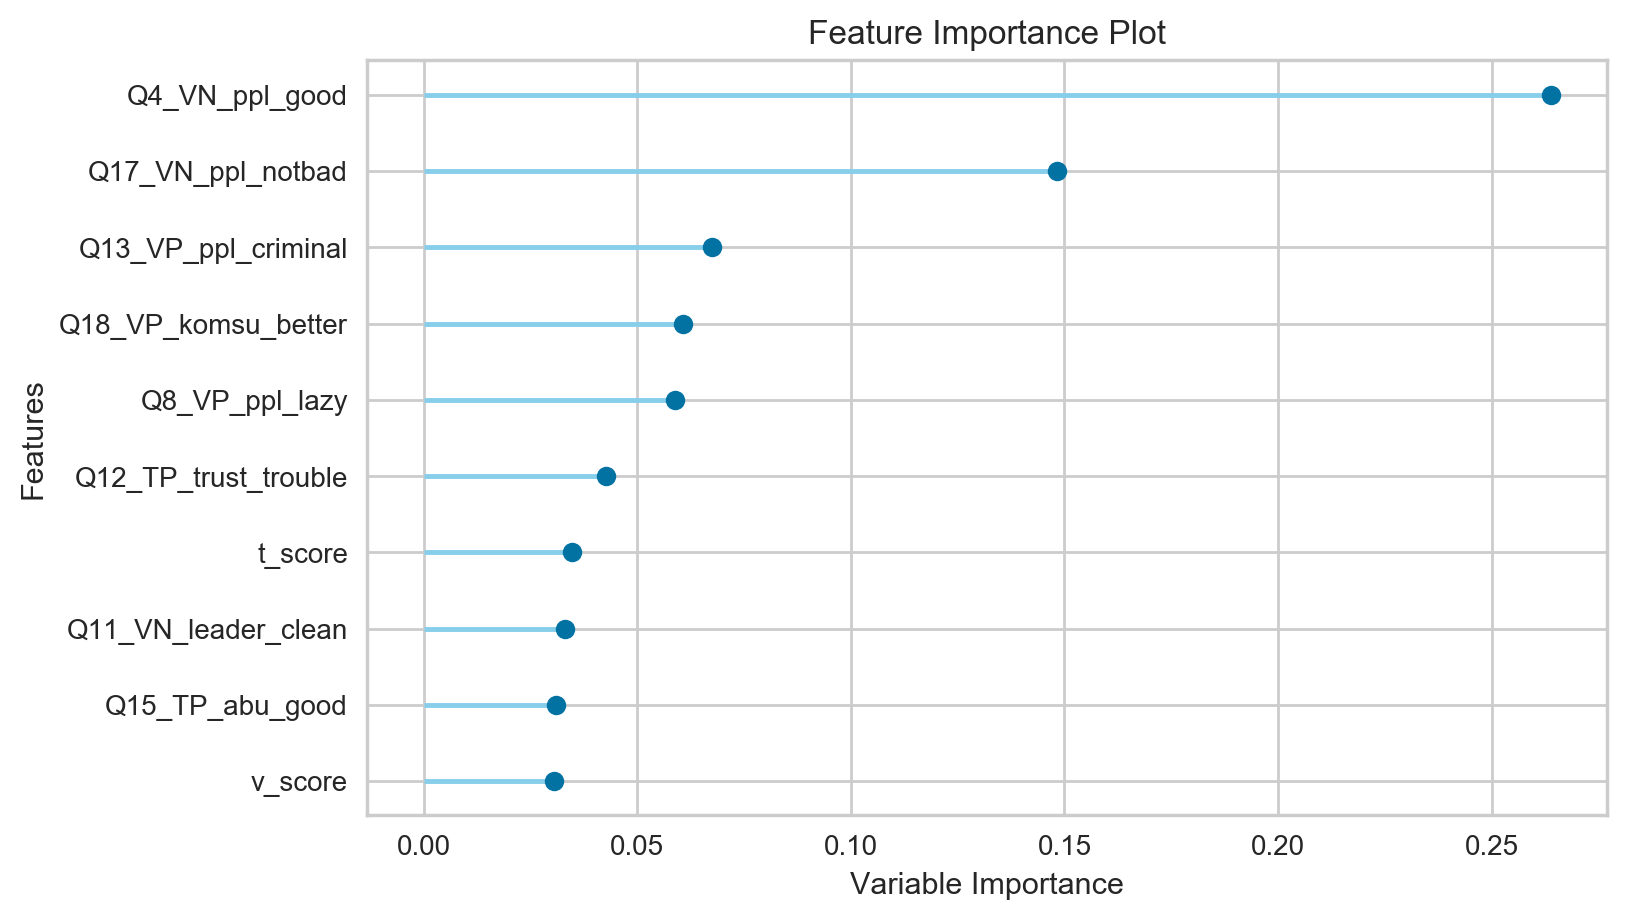

In [107]:
plot_model(estimator = gbc, plot = 'feature')

#### Linear Discriminant Analysis

In [108]:
lda=create_model("lda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5852,0.6193,0.4958,0.5671,0.5290,0.1614,0.1626
1,0.6026,0.6290,0.4926,0.5929,0.5381,0.1946,0.1971
2,0.6220,0.6582,0.5317,0.6127,0.5693,0.2354,0.2373
3,0.5807,0.6237,0.4577,0.5668,0.5064,0.1491,0.1517
4,0.5919,0.6236,0.4899,0.5773,0.5301,0.1737,0.1756
5,0.5880,0.6114,0.4910,0.5714,0.5282,0.1662,0.1677
6,0.5790,0.6102,0.4487,0.5653,0.5003,0.1449,0.1477
7,0.6143,0.6499,0.5249,0.6027,0.5611,0.2200,0.2217
8,0.5840,0.6183,0.4677,0.5696,0.5137,0.1563,0.1586
9,0.5810,0.6032,0.4767,0.5645,0.5169,0.1516,0.1533


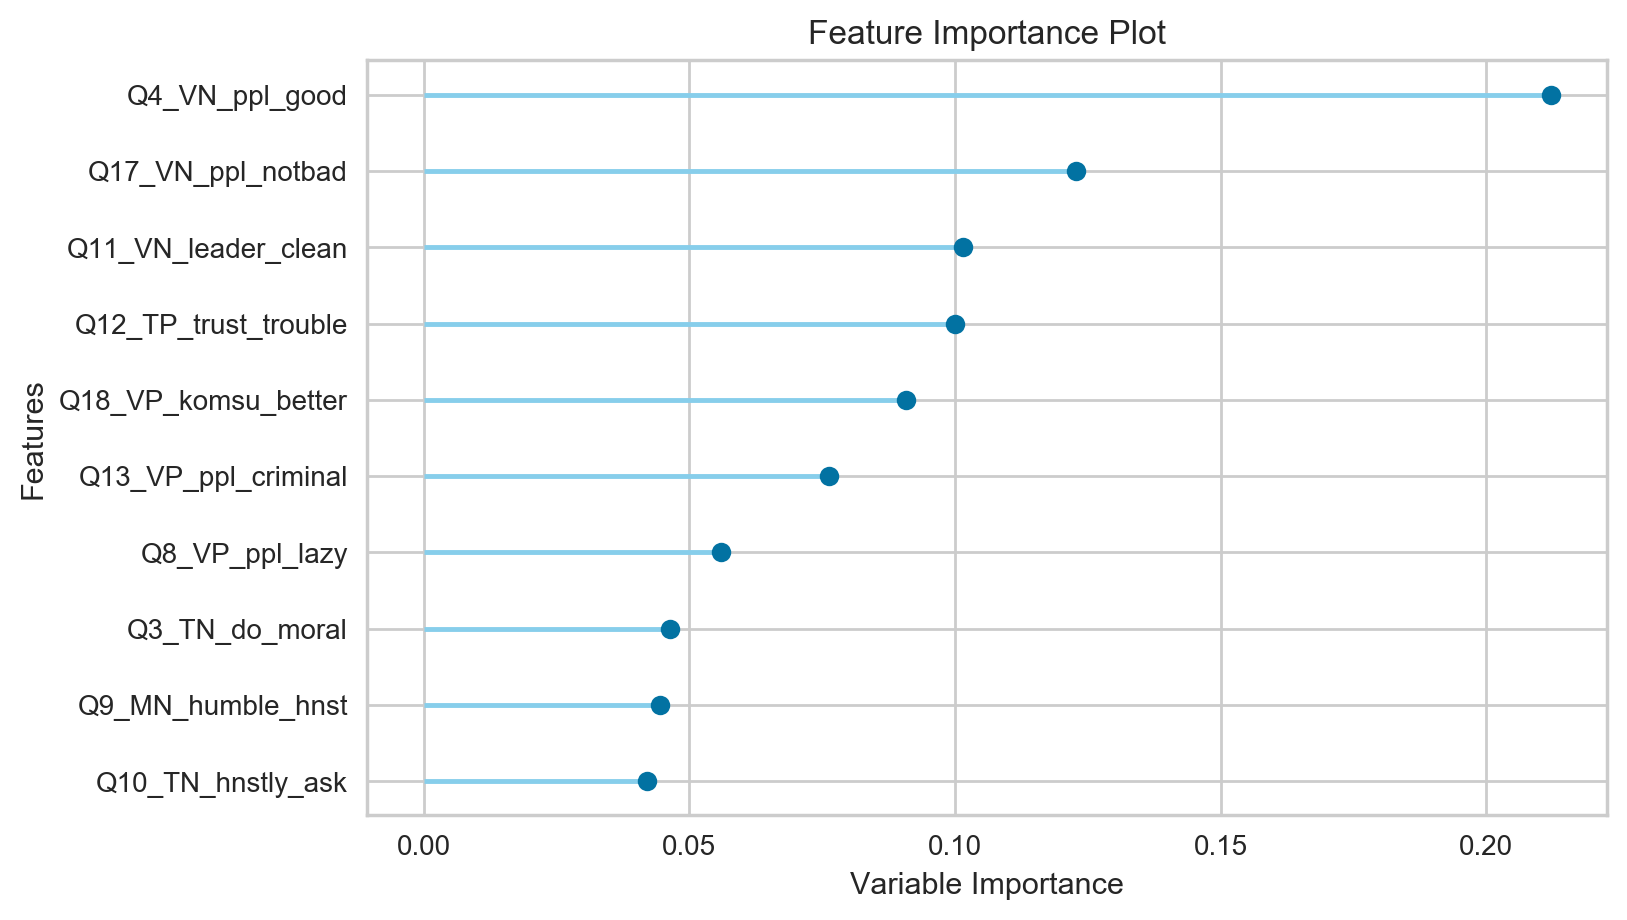

In [109]:
plot_model(estimator = lda, plot = 'feature')

### automl 스케일 maxabs

In [97]:
from pycaret.classification import *

In [134]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data=df2, target="voted", normalize=True, normalize_method = "maxabs")

Setup Succesfully Completed!


,Description,Value
0,session_id,6019
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(28749, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [102]:
# train test 7:3
(20124 + 8625)/8625

3.333217391304348

In [131]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.6029,0.6407,0.5100,0.5895,0.5468,0.1968,0.1984,2.0452
1,Ada Boost Classifier,0.5998,0.6349,0.5019,0.5867,0.5408,0.1901,0.1920,0.5448
2,CatBoost Classifier,0.5983,0.6335,0.5247,0.5802,0.5510,0.1893,0.1902,7.1747
3,Light Gradient Boosting Machine,0.5944,0.6293,0.5242,0.5750,0.5483,0.1818,0.1824,0.1843
4,Linear Discriminant Analysis,0.5942,0.6253,0.4911,0.5807,0.5320,0.1783,0.1803,0.0449
5,Ridge Classifier,0.5940,0.0000,0.4906,0.5805,0.5317,0.1778,0.1799,0.0093
6,Logistic Regression,0.5937,0.6253,0.4895,0.5803,0.5309,0.1772,0.1792,0.0584
7,Extra Trees Classifier,0.5837,0.6084,0.4810,0.5672,0.5205,0.1570,0.1587,0.5095
8,Extreme Gradient Boosting,0.5777,0.6034,0.5162,0.5544,0.5345,0.1490,0.1494,2.1047
9,SVM - Linear Kernel,0.5695,0.0000,0.6123,0.5528,0.5488,0.1427,0.1585,0.0979


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4161, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### catboost 안그려짐

In [135]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6195,0.6536,0.5539,0.6037,0.5777,0.2326,0.2333
1,0.5872,0.6241,0.5148,0.5669,0.5396,0.1670,0.1677
2,0.6215,0.6534,0.5571,0.6057,0.5804,0.2367,0.2374
3,0.6175,0.6534,0.5370,0.6048,0.5689,0.2273,0.2286
4,0.5910,0.6224,0.5402,0.5684,0.5539,0.1767,0.1769
5,0.6059,0.6434,0.5101,0.5936,0.5487,0.2024,0.2042
6,0.5885,0.6231,0.5058,0.5697,0.5359,0.1686,0.1695
7,0.5915,0.6276,0.5185,0.5718,0.5438,0.1755,0.1762
8,0.6178,0.6507,0.5492,0.6021,0.5744,0.2289,0.2297
9,0.5900,0.6251,0.5111,0.5709,0.5394,0.1719,0.1728


In [110]:
plot_model(estimator = catboost, plot = 'feature')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

#### gbc

In [136]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6115,0.6491,0.5159,0.6010,0.5552,0.2139,0.2159
1,0.6026,0.6332,0.5074,0.5897,0.5455,0.1959,0.1977
2,0.6170,0.6582,0.5338,0.6048,0.5671,0.2261,0.2275
3,0.6125,0.6550,0.5032,0.6056,0.5497,0.2147,0.2175
4,0.5880,0.6210,0.5021,0.5702,0.5340,0.1674,0.1685
5,0.6029,0.6482,0.4878,0.5941,0.5357,0.1946,0.1975
6,0.5944,0.6301,0.5111,0.5771,0.5421,0.1805,0.1816
7,0.5895,0.6249,0.4942,0.5730,0.5307,0.1694,0.1708
8,0.6183,0.6497,0.5323,0.6068,0.5671,0.2283,0.2299
9,0.6083,0.6376,0.5005,0.5995,0.5456,0.2063,0.2089


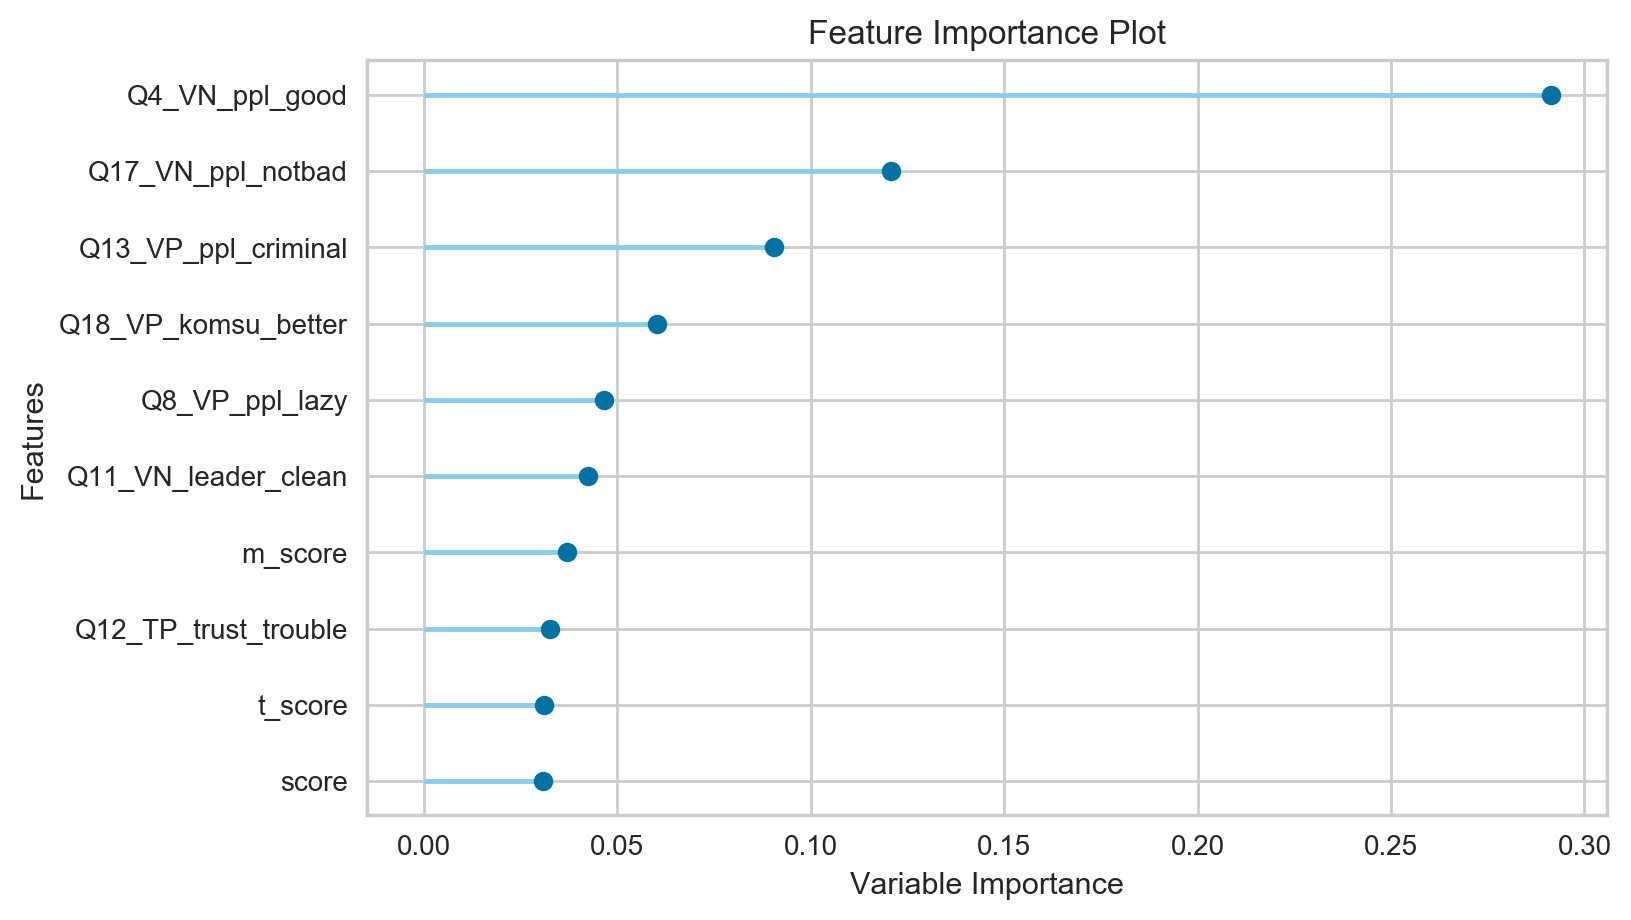

In [137]:
plot_model(estimator = gbc, plot = 'feature')

#### ada

In [138]:
ada=create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6135,0.6511,0.5275,0.6012,0.5619,0.2188,0.2203
1,0.5857,0.6214,0.4820,0.5700,0.5223,0.1610,0.1628
2,0.6076,0.6466,0.5180,0.5947,0.5537,0.2065,0.2080
3,0.6071,0.6476,0.4937,0.5995,0.5414,0.2033,0.2062
4,0.5850,0.6131,0.5021,0.5662,0.5322,0.1617,0.1626
5,0.5959,0.6374,0.4720,0.5868,0.5232,0.1797,0.1829
6,0.5979,0.6236,0.5079,0.5825,0.5427,0.1869,0.1883
7,0.5795,0.6262,0.4847,0.5606,0.5199,0.1494,0.1506
8,0.6143,0.6455,0.5291,0.6017,0.5631,0.2204,0.2219
9,0.6044,0.6326,0.5026,0.5930,0.5441,0.1988,0.2010


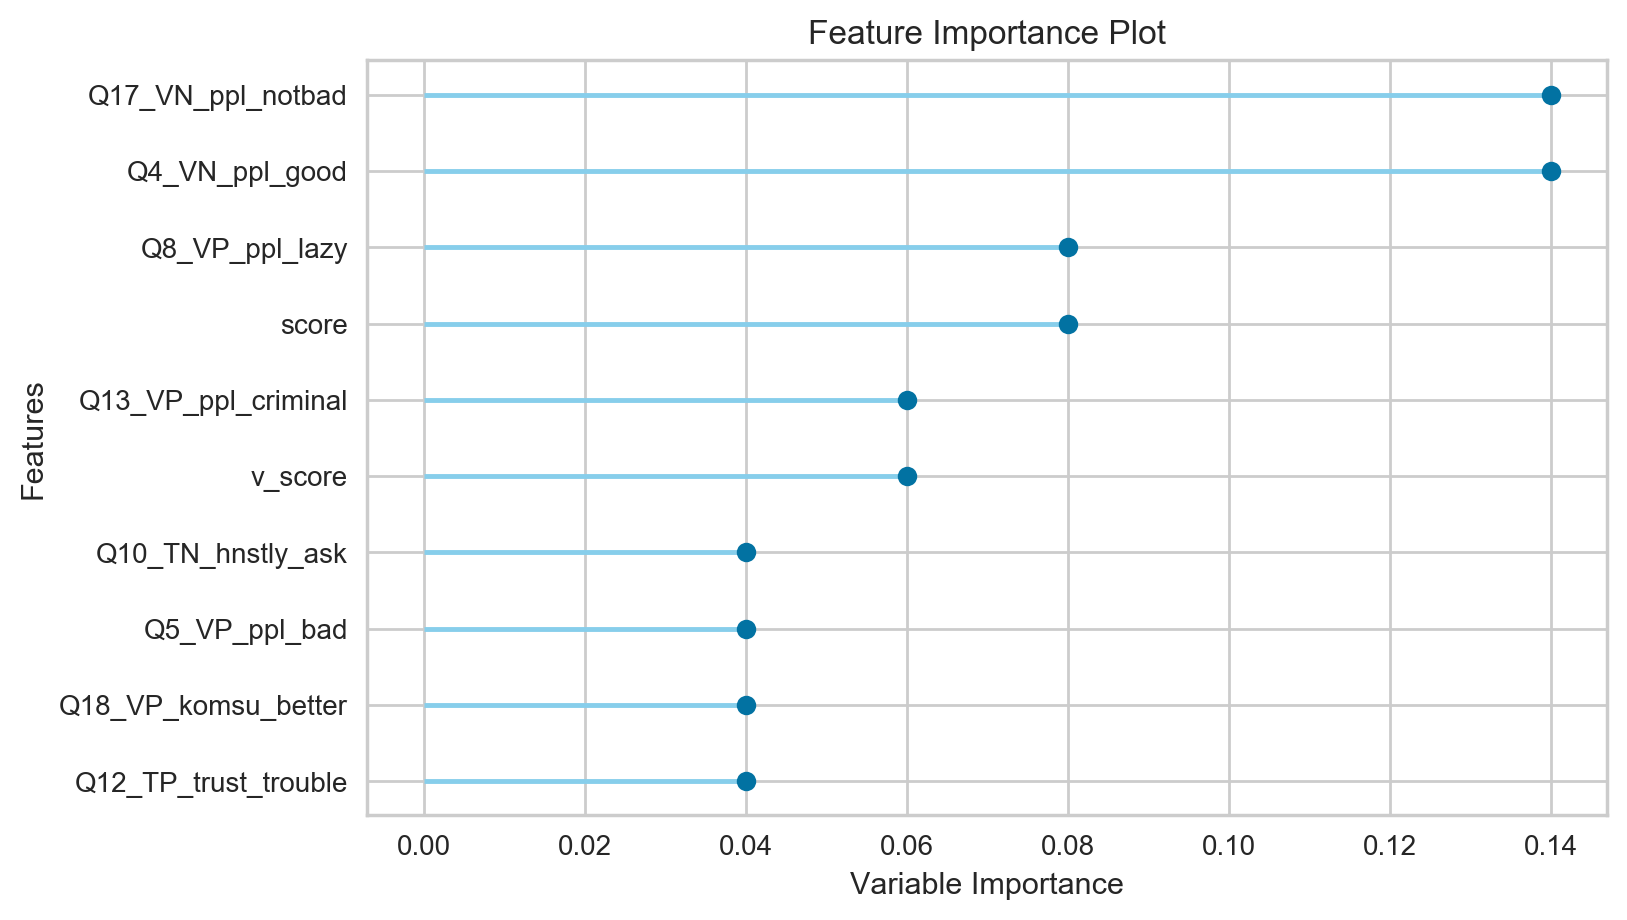

In [139]:
plot_model(estimator = ada, plot = 'feature')

### automl 스케일 robust

In [97]:
from pycaret.classification import *

In [140]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data=df2, target="voted", normalize=True, normalize_method = "robust")

Setup Succesfully Completed!


,Description,Value
0,session_id,1878
1,Target Type,Binary
2,Label Encoded,"No: 0, Yes: 1"
3,Original Data,"(28749, 25)"
4,Missing Values,False
5,Numeric Features,24
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [102]:
# train test 7:3
(20124 + 8625)/8625

3.333217391304348

In [141]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Ada Boost Classifier,0.5982,0.6329,0.4979,0.5852,0.5379,0.1866,0.1885,0.5429
1,CatBoost Classifier,0.5969,0.6315,0.5240,0.5786,0.5498,0.1865,0.1874,7.9490
2,Gradient Boosting Classifier,0.5961,0.6355,0.4896,0.5836,0.5324,0.1817,0.1839,2.0360
3,Light Gradient Boosting Machine,0.5958,0.6284,0.5213,0.5775,0.5478,0.1842,0.1850,0.2089
4,Logistic Regression,0.5951,0.6252,0.4928,0.5816,0.5333,0.1800,0.1820,0.0247
5,Ridge Classifier,0.5951,0.0000,0.4930,0.5816,0.5335,0.1802,0.1821,0.0092
6,Linear Discriminant Analysis,0.5951,0.6252,0.4931,0.5816,0.5335,0.1802,0.1822,0.0445
7,SVM - Linear Kernel,0.5855,0.0000,0.4568,0.5768,0.5006,0.1578,0.1638,0.1226
8,Extra Trees Classifier,0.5786,0.6066,0.4758,0.5609,0.5148,0.1467,0.1483,0.4873
9,Extreme Gradient Boosting,0.5753,0.6063,0.5170,0.5516,0.5336,0.1446,0.1449,2.1414


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1878)

#### catboost 안그려짐

In [142]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5956,0.6295,0.5402,0.5742,0.5566,0.1856,0.1859
1,0.6105,0.6498,0.5264,0.5971,0.5596,0.2130,0.2143
2,0.6001,0.6348,0.5275,0.5823,0.5535,0.1930,0.1938
3,0.5623,0.5908,0.4831,0.5383,0.5092,0.1164,0.1169
4,0.6064,0.6426,0.5063,0.5958,0.5474,0.2032,0.2053
5,0.6029,0.6361,0.5386,0.5837,0.5603,0.1993,0.1998
6,0.6029,0.6467,0.5217,0.5869,0.5524,0.1977,0.1988
7,0.5984,0.6308,0.5566,0.5749,0.5656,0.1924,0.1925
8,0.5910,0.6252,0.5196,0.5709,0.5440,0.1746,0.1753
9,0.5989,0.6285,0.5196,0.5818,0.5489,0.1899,0.1909


In [110]:
plot_model(estimator = catboost, plot = 'feature')

SystemExit: (Estimator Error): CatBoost estimator is not compatible with plot_model function, try using Catboost with interpret_model instead.

#### gbc

In [143]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5862,0.6267,0.4810,0.5709,0.5221,0.1619,0.1637
1,0.6021,0.6509,0.4852,0.5938,0.5340,0.1929,0.1959
2,0.6016,0.6400,0.5106,0.5876,0.5464,0.1943,0.1958
3,0.5658,0.5952,0.4556,0.5456,0.4965,0.1203,0.1218
4,0.5954,0.6387,0.4725,0.5866,0.5234,0.1790,0.1821
5,0.5989,0.6375,0.4995,0.5856,0.5391,0.1880,0.1899
6,0.6074,0.6519,0.4889,0.6008,0.5391,0.2033,0.2066
7,0.5934,0.6391,0.4963,0.5783,0.5342,0.1772,0.1788
8,0.6044,0.6418,0.5090,0.5916,0.5472,0.1994,0.2012
9,0.6054,0.6332,0.4974,0.5957,0.5421,0.2003,0.2028


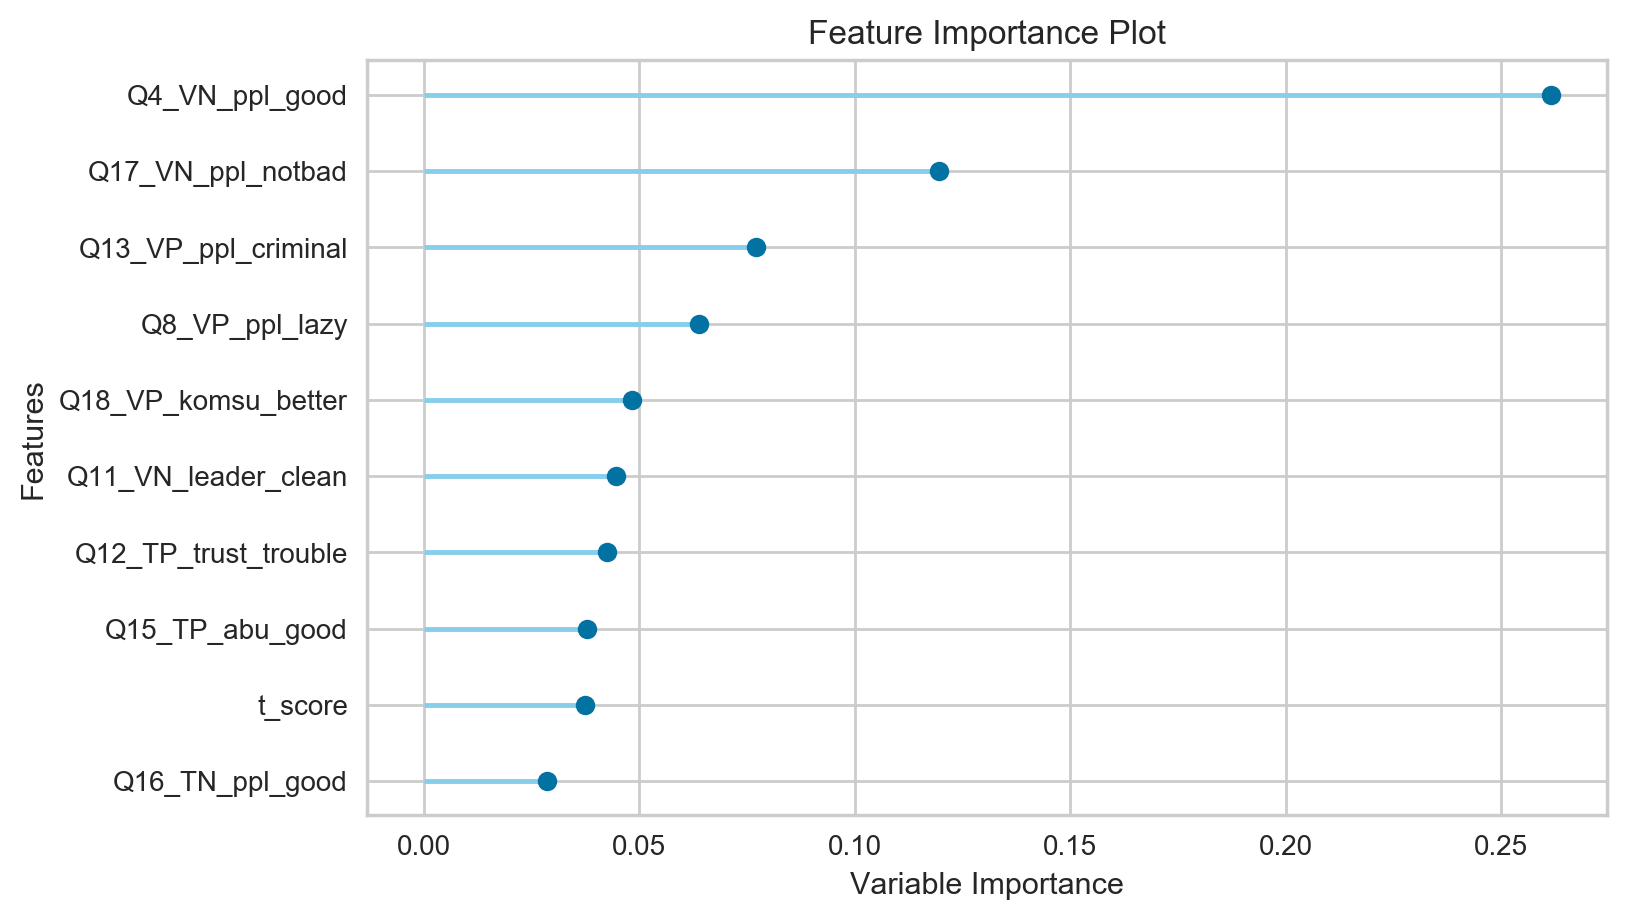

In [144]:
plot_model(estimator = gbc, plot = 'feature')

#### ada

In [145]:
ada=create_model("ada")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5971,0.6334,0.5053,0.5822,0.5410,0.1852,0.1867
1,0.6100,0.6556,0.4989,0.6028,0.5460,0.2095,0.2124
2,0.6071,0.6411,0.5137,0.5949,0.5513,0.2051,0.2069
3,0.5787,0.5928,0.4767,0.5609,0.5154,0.1472,0.1487
4,0.5895,0.6281,0.4852,0.5752,0.5264,0.1687,0.1706
5,0.5969,0.6318,0.5026,0.5821,0.5395,0.1845,0.1861
6,0.6044,0.6459,0.4751,0.5995,0.5301,0.1963,0.2003
7,0.5979,0.6357,0.5153,0.5811,0.5463,0.1876,0.1887
8,0.6093,0.6392,0.5238,0.5957,0.5574,0.2104,0.2118
9,0.5910,0.6255,0.4825,0.5772,0.5256,0.1711,0.1732


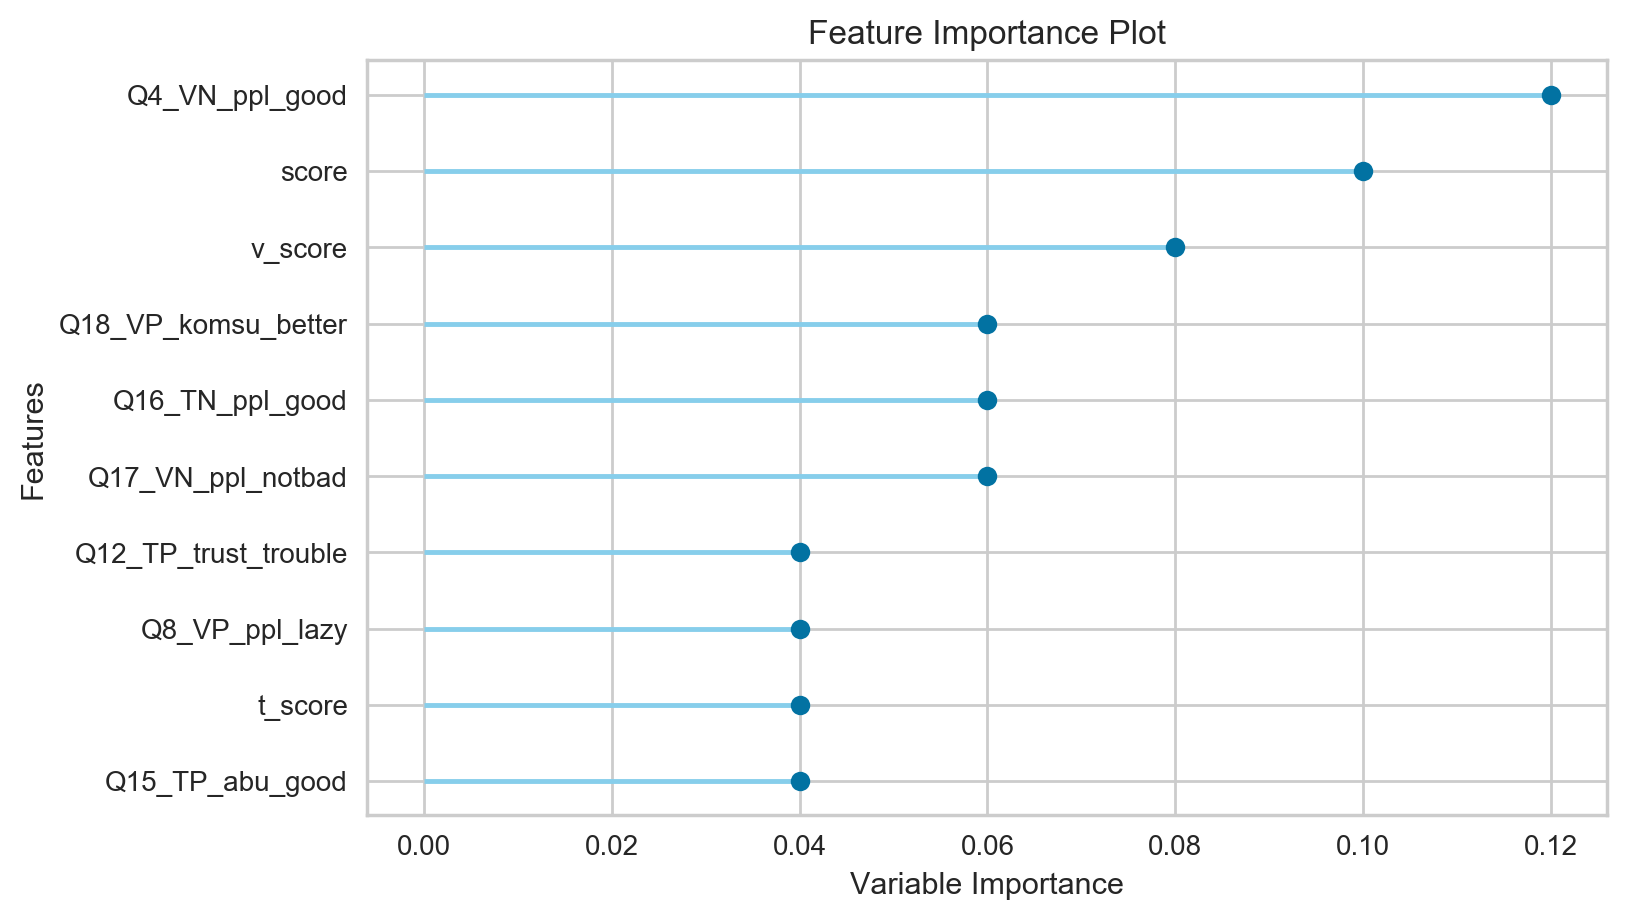

In [146]:
plot_model(estimator = ada, plot = 'feature')

# 마키아벨리즘 문항 + T, V, M, score  와 voted 

## 미국 데이터 avg 기준, nan, 0 제외

In [1]:
df1 = pd.read_csv('../MACH_data/cut_off_by_avg.csv')
df1

,Q1_TP_notell_2u,Q1I,Q1E_notell_2u,Q2_TP_ppl_nd_dangun,Q2I,Q2E_ppl_nd_dangun,Q3_TN_do_moral,Q3I,Q3E_do_moral,Q4_VN_ppl_good,...,religion,orientation,race,voted,married,familysize,score,v_score,t_score,m_score
0,5.0,17.0,4.0,5.0,9.0,8.0,1.0,16.0,6.0,3.0,...,Agnostic,Heterosexual,White,No,Never married,2,91.0,37.0,45.0,9.0
1,5.0,16.0,4.0,5.0,12.0,3.0,1.0,2.0,7.0,1.0,...,Atheist,Bisexual,Asian,No,Never married,2,98.0,43.0,45.0,10.0
2,2.0,12.0,9.0,4.0,1.0,10.0,2.0,7.0,10.0,1.0,...,Christian(Protestant),Heterosexual,White,Yes,Previously married,2,78.0,37.0,36.0,5.0
3,5.0,13.0,9.0,5.0,7.0,5.0,2.0,19.0,9.0,1.0,...,Christian(Catholic),Homosexual,White,Yes,Never married,2,85.0,35.0,41.0,9.0
4,4.0,4.0,9.0,3.0,5.0,6.0,5.0,15.0,18.0,3.0,...,Agnostic,Heterosexual,Other,No,Never married,3,76.0,36.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53015,4.0,15.0,5.0,1.0,16.0,5.0,1.0,10.0,5.0,1.0,...,Agnostic,Homosexual,White,Yes,Never married,3,83.0,42.0,34.0,7.0
53016,5.0,1.0,10.0,5.0,13.0,5.0,4.0,15.0,11.0,4.0,...,Other,Heterosexual,Asian,No,Never married,1,64.0,31.0,26.0,7.0
53017,2.0,17.0,10.0,1.0,6.0,14.0,2.0,16.0,25.0,4.0,...,Other,Heterosexual,Asian,No,Currently married,1,59.0,28.0,26.0,5.0
53018,5.0,9.0,6.0,5.0,4.0,4.0,1.0,15.0,7.0,1.0,...,Atheist,Homosexual,White,No,Never married,2,90.0,37.0,43.0,10.0
